In [4]:
import pandas as pd
import os
from datetime import datetime, timedelta
from tqdm import tqdm
import gc
import sys

import matplotlib.pyplot as plt

import MetaTrader5 as mt5
import talib

path_root = "D:/Documentos/Erik/TDR/TDR-Forex"
sys.path.append(path_root)
from utils.mt5 import init_mt5
from utils.data import get_symbols_info, save_data

output_path = os.path.join(path_root, "output", "Forex")
os.makedirs(output_path, exist_ok=True)

### Obtenint símbols de forex disponibles a MT5

In [6]:
symbols = get_symbols_info(path_root, save=True)
symbols.head(2)

We have 123 forex symbols


,name,description,currency_base,currency_quote,digits,spread,point,volume_min,volume_max,swap_long,swap_short
0,AUDCAD,Australian Dollar vs Canadian Dollar,AUD,CAD,5,0,0.00001,0.01,500.0,6.4,-15.4
1,AUDCHF,Australian Dollar vs Swiss Franc,AUD,CHF,5,0,0.00001,0.01,500.0,7.1,-15.8


### Guardant històric de les majors

Guardant dades:   0%|                                                                        | 0/7 [00:00<?, ?símbol/s]

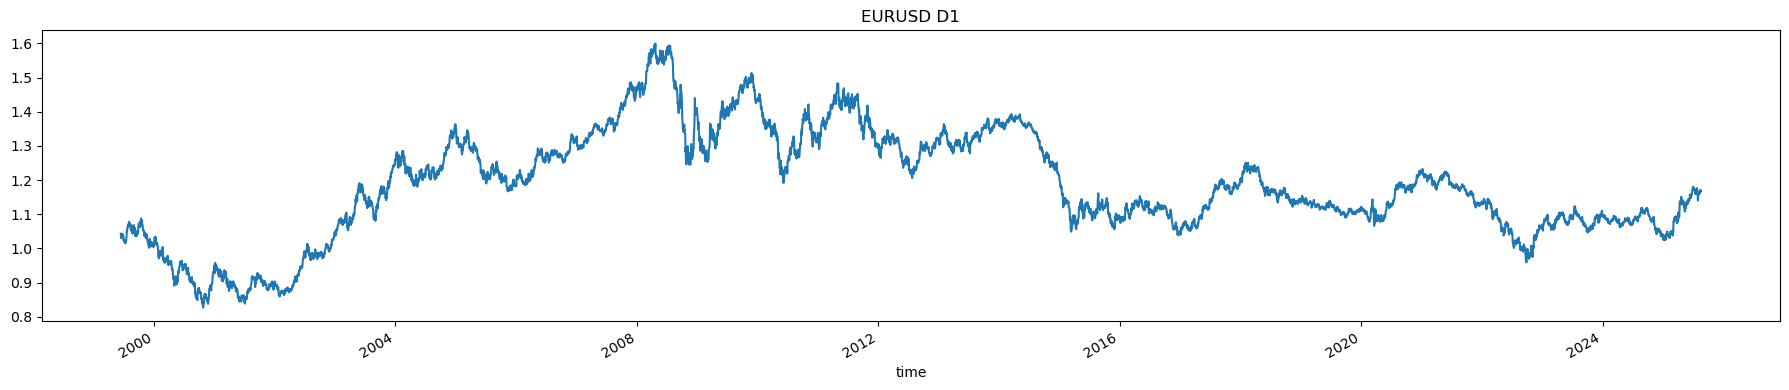

,símbol,finestra,inici,fi,MB,n_barres
0,EURUSD,M1,1999-06-14 22:01:00,2025-08-18 13:43:00,90.58,9513276
1,EURUSD,M5,1999-06-14 22:00:00,2025-08-18 13:45:00,21.92,1942397
2,EURUSD,M15,1999-06-14 22:00:00,2025-08-18 13:45:00,8.13,649006
3,EURUSD,H1,1999-06-14 22:00:00,2025-08-18 13:00:00,2.28,162535
4,EURUSD,D1,1999-06-15 00:00:00,2025-08-18 00:00:00,0.11,6807


Guardant dades:  14%|█████████                                                      | 1/7 [03:07<18:44, 187.38s/símbol]

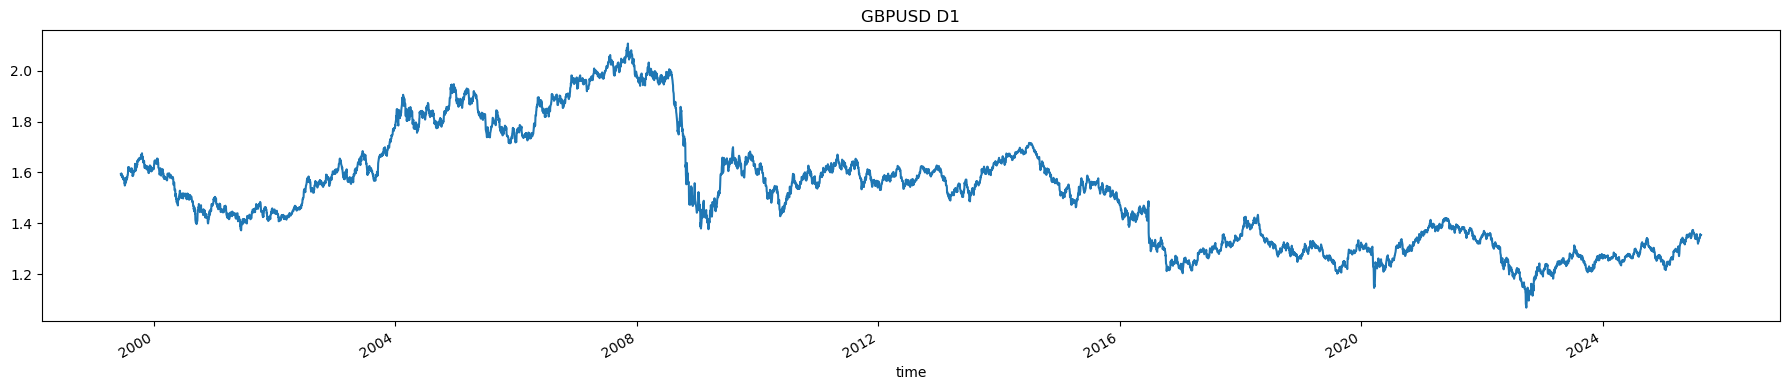

,símbol,finestra,inici,fi,MB,n_barres
0,GBPUSD,M1,1999-06-14 22:00:00,2025-08-18 13:46:00,95.75,9383691
1,GBPUSD,M5,1999-06-14 22:00:00,2025-08-18 13:45:00,23.16,1936543
2,GBPUSD,M15,1999-06-14 22:00:00,2025-08-18 13:45:00,8.57,648303
3,GBPUSD,H1,1999-06-14 22:00:00,2025-08-18 13:00:00,2.39,162459
4,GBPUSD,D1,1999-06-15 00:00:00,2025-08-18 00:00:00,0.11,6806


Guardant dades:  29%|██████████████████                                             | 2/7 [06:19<15:51, 190.22s/símbol]

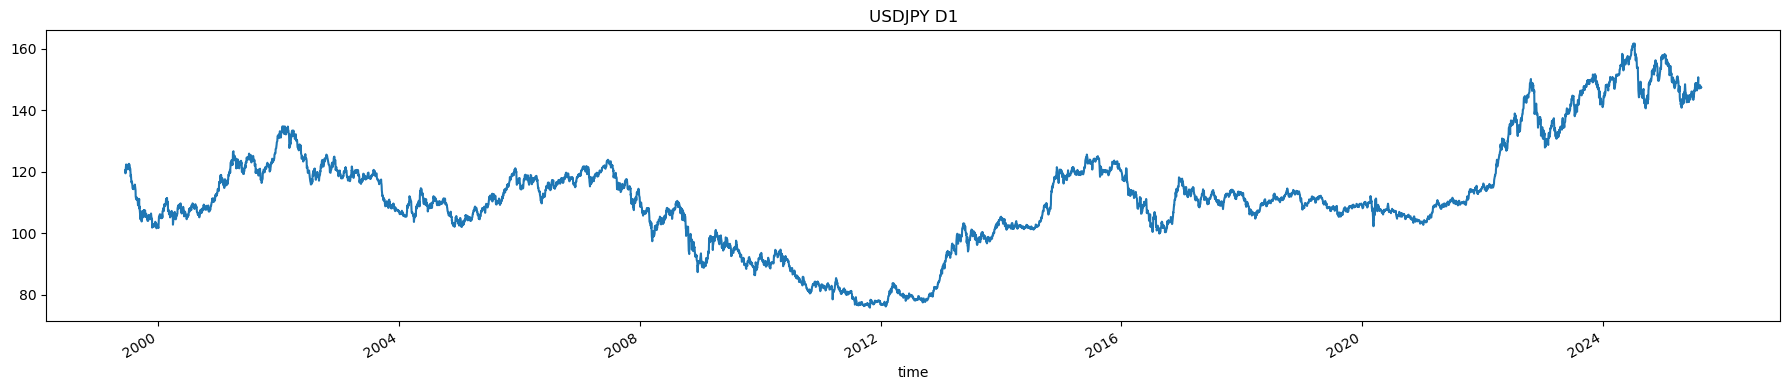

,símbol,finestra,inici,fi,MB,n_barres
0,USDJPY,M1,1999-06-14 22:01:00,2025-08-18 13:50:00,88.43,9468383
1,USDJPY,M5,1999-06-14 22:00:00,2025-08-18 13:50:00,21.37,1940826
2,USDJPY,M15,1999-06-14 22:00:00,2025-08-18 13:45:00,7.89,648483
3,USDJPY,H1,1999-06-14 22:00:00,2025-08-18 13:00:00,2.22,162445
4,USDJPY,D1,1999-06-15 00:00:00,2025-08-18 00:00:00,0.11,6807


Guardant dades:  43%|███████████████████████████                                    | 3/7 [09:21<12:25, 186.31s/símbol]

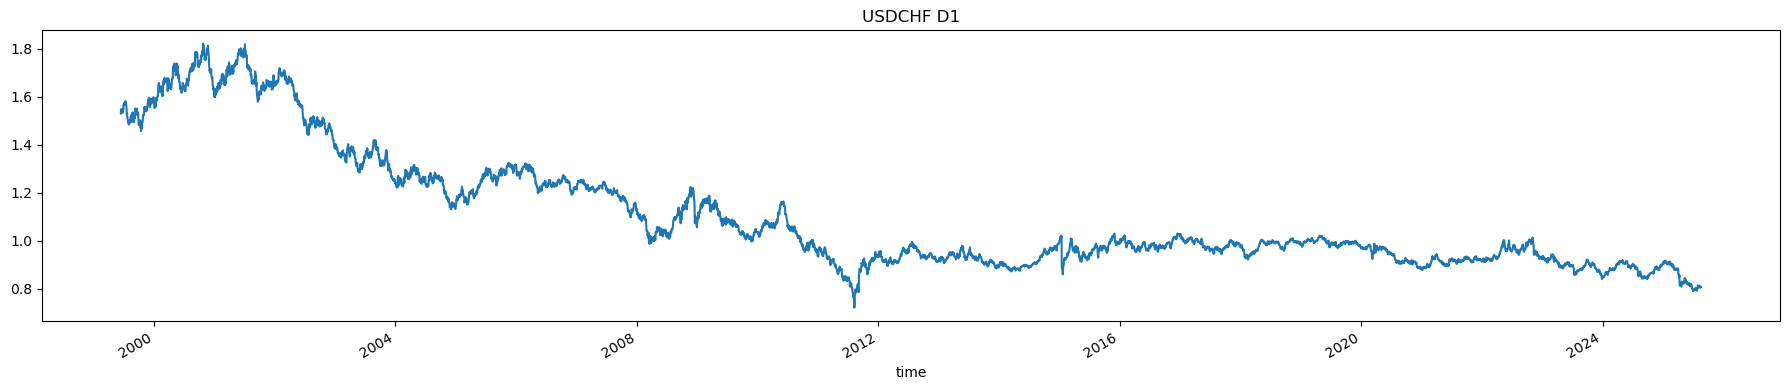

,símbol,finestra,inici,fi,MB,n_barres
0,USDCHF,M1,1999-06-14 22:03:00,2025-08-18 13:53:00,88.94,9410145
1,USDCHF,M5,1999-06-14 22:00:00,2025-08-18 13:55:00,21.75,1937365
2,USDCHF,M15,1999-06-14 22:00:00,2025-08-18 13:45:00,8.06,648254
3,USDCHF,H1,1999-06-14 22:00:00,2025-08-18 13:00:00,2.26,162433
4,USDCHF,D1,1999-06-15 00:00:00,2025-08-18 00:00:00,0.11,6806


Guardant dades:  57%|████████████████████████████████████                           | 4/7 [12:29<09:21, 187.26s/símbol]

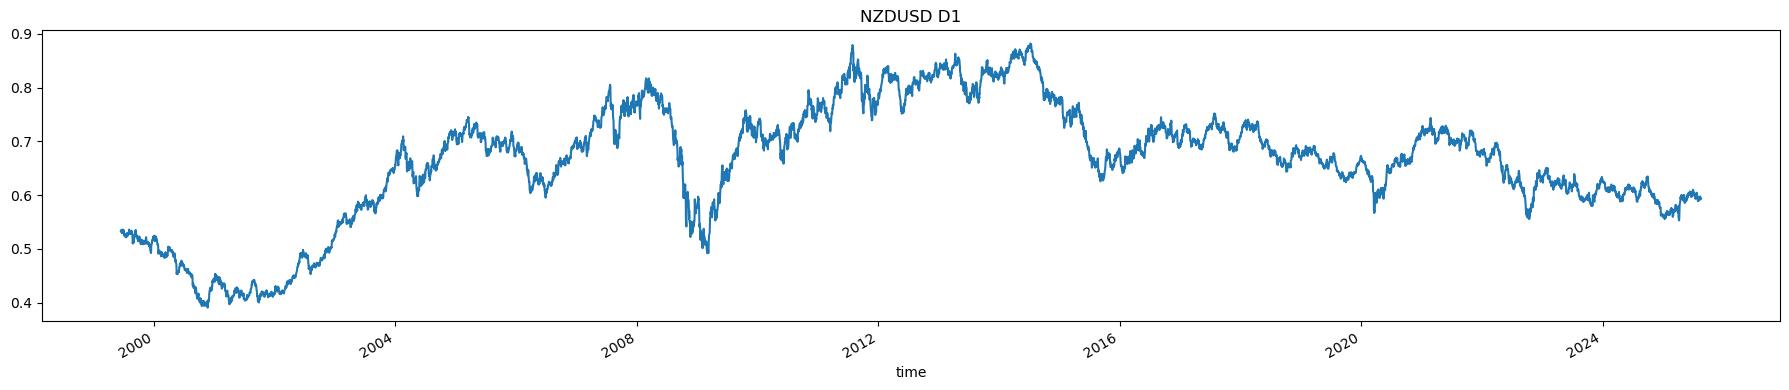

,símbol,finestra,inici,fi,MB,n_barres
0,NZDUSD,M1,1999-06-15,2025-08-18 13:56:00,81.04,8657877
1,NZDUSD,M5,1999-06-15,2025-08-18 13:55:00,20.43,1875028
2,NZDUSD,M15,1999-06-15,2025-08-18 13:45:00,7.62,633638
3,NZDUSD,H1,1999-06-15,2025-08-18 13:00:00,2.15,159052
4,NZDUSD,D1,1999-06-15,2025-08-18 00:00:00,0.11,6806


Guardant dades:  71%|█████████████████████████████████████████████                  | 5/7 [15:25<06:06, 183.12s/símbol]

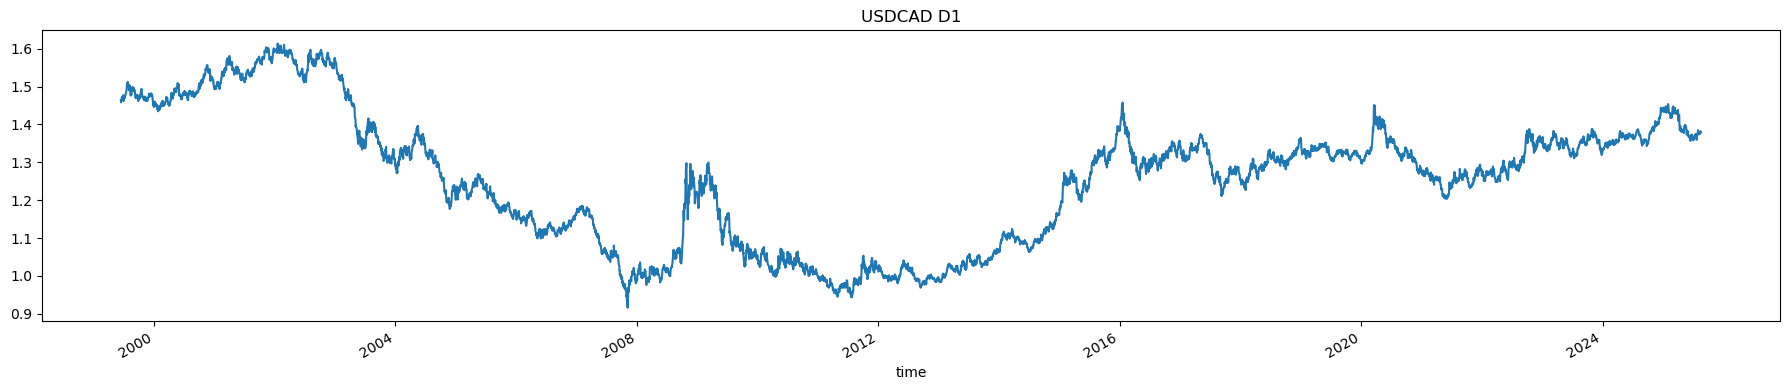

,símbol,finestra,inici,fi,MB,n_barres
0,USDCAD,M1,1999-06-14 22:00:00,2025-08-18 13:59:00,86.91,8973630
1,USDCAD,M5,1999-06-14 22:00:00,2025-08-18 14:00:00,21.61,1913899
2,USDCAD,M15,1999-06-14 22:00:00,2025-08-18 14:00:00,8.07,646793
3,USDCAD,H1,1999-06-14 22:00:00,2025-08-18 14:00:00,2.27,162462
4,USDCAD,D1,1999-06-15 00:00:00,2025-08-18 00:00:00,0.11,6808


Guardant dades:  86%|██████████████████████████████████████████████████████         | 6/7 [18:26<03:02, 182.34s/símbol]

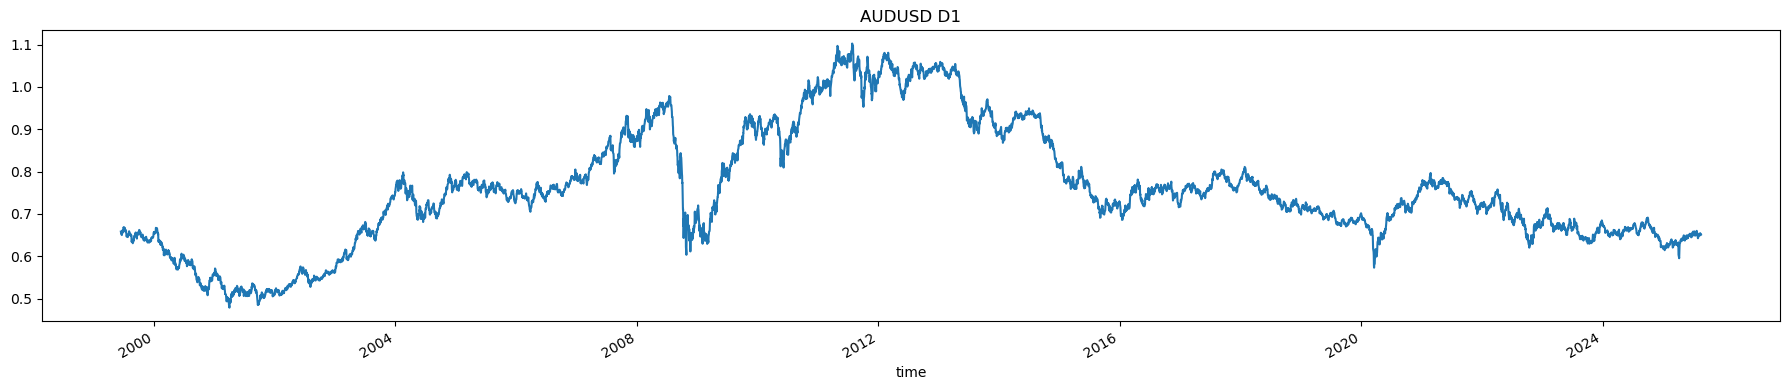

,símbol,finestra,inici,fi,MB,n_barres
0,AUDUSD,M1,1999-06-14 22:00:00,2025-08-18 14:02:00,84.53,9156254
1,AUDUSD,M5,1999-06-14 22:00:00,2025-08-18 14:00:00,20.92,1931315
2,AUDUSD,M15,1999-06-14 22:00:00,2025-08-18 14:00:00,7.76,648110
3,AUDUSD,H1,1999-06-14 22:00:00,2025-08-18 14:00:00,2.18,162463
4,AUDUSD,D1,1999-06-15 00:00:00,2025-08-18 00:00:00,0.11,6807


Guardant dades: 100%|███████████████████████████████████████████████████████████████| 7/7 [21:25<00:00, 183.62s/símbol]


In [7]:
start = datetime(2000,1,1) - timedelta(days=200)
end = datetime(2030,1,1)
symbols = ["EURUSD", "GBPUSD", "USDJPY", "USDCHF", "NZDUSD", "USDCAD", "AUDUSD"]

save_data(symbols, start, end, path_root)

### Qualitat de les dades D1

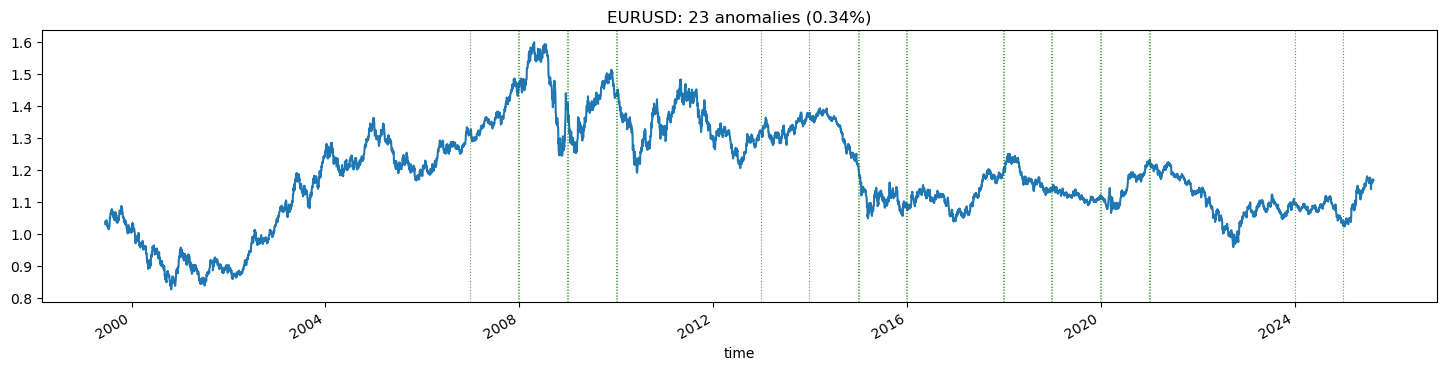

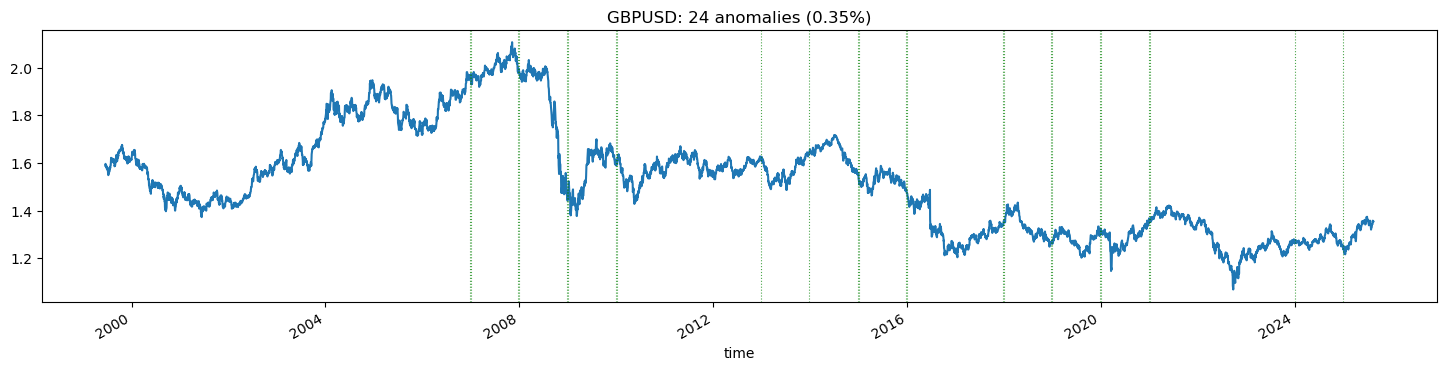

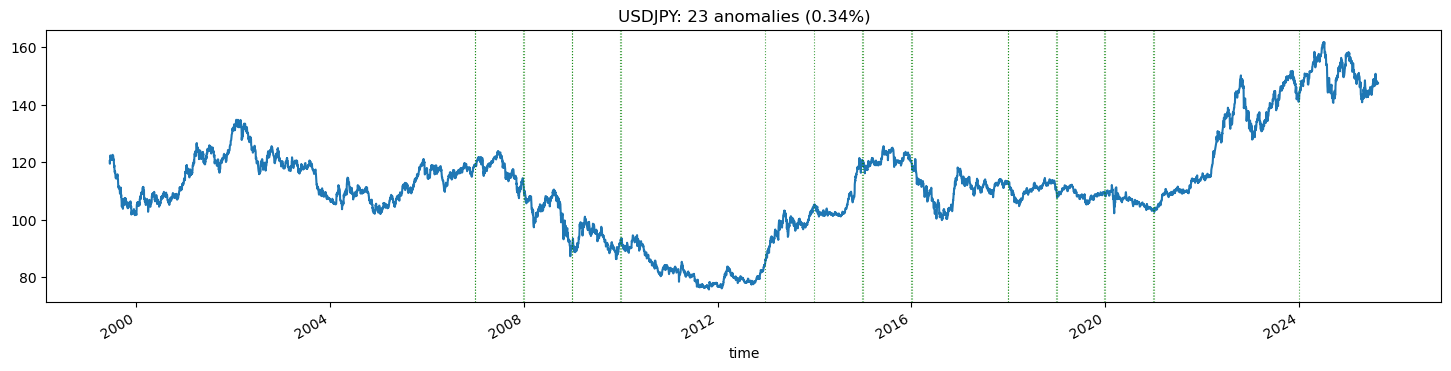

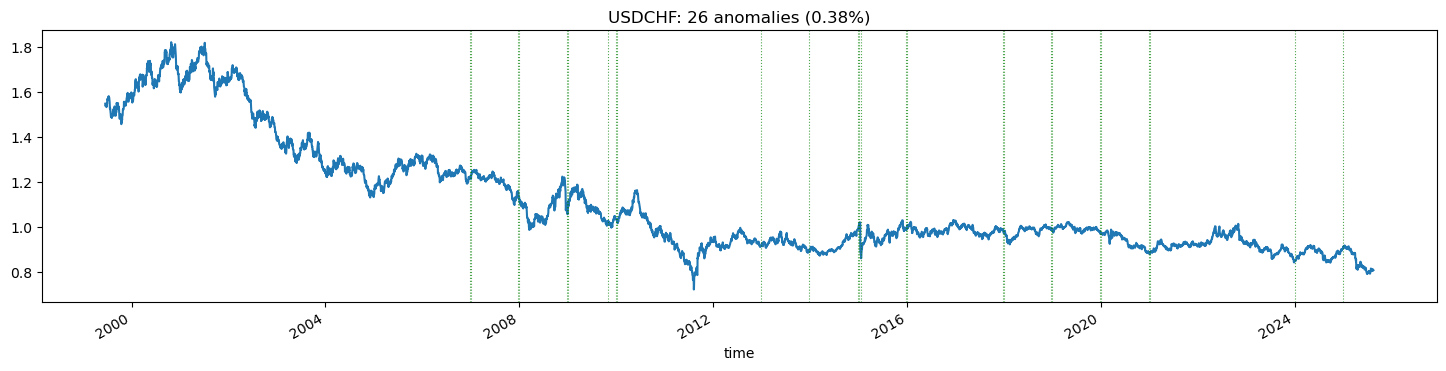

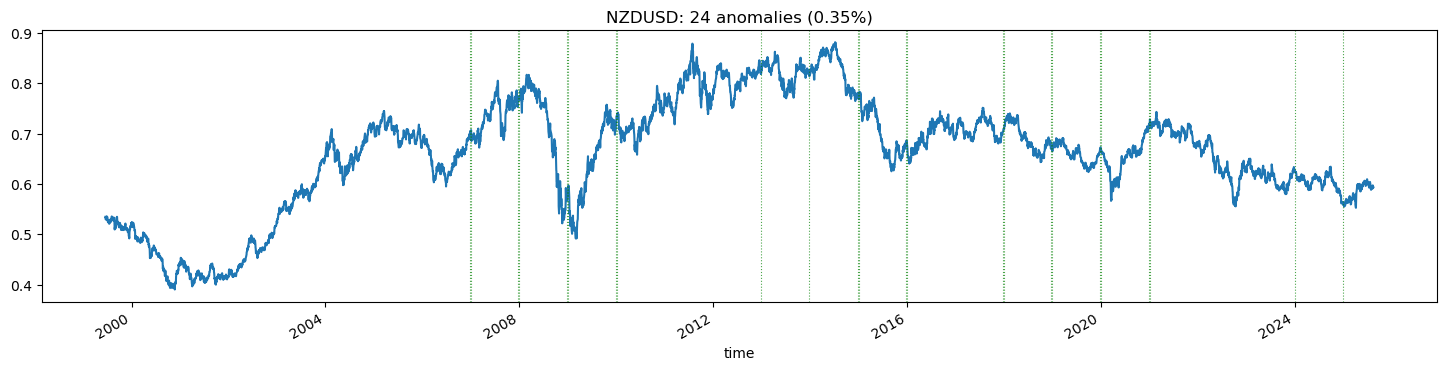

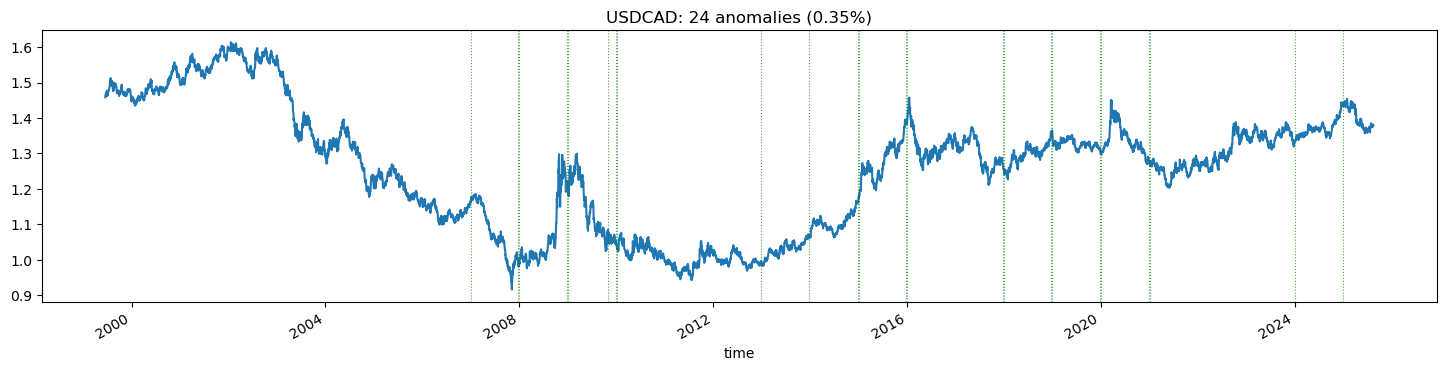

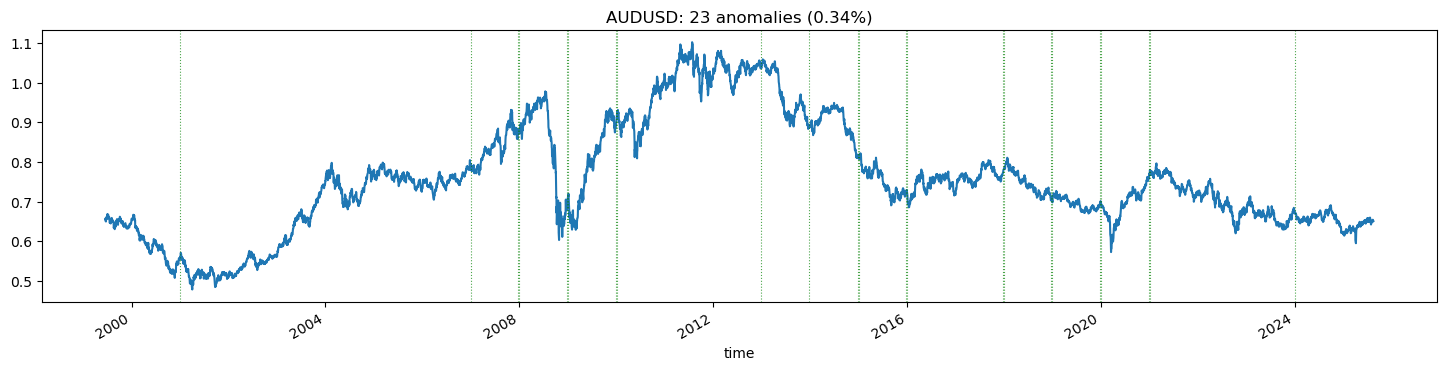

In [8]:
timeframe = "D1"
for symbol in symbols:
    path_data = os.path.join(path_root, "output", "Forex", timeframe)
    filename = os.path.join(path_data, f"{symbol}.csv.gz")
    data = pd.read_csv(filename, parse_dates=["time"])
    data["dow"] = data.time.dt.dayofweek
    data["diff_time"] = data.time.diff().dt.days
    data = data.dropna().reset_index(drop=True)
    anomalies = data[((data['diff_time'] > 1) & (data.dow != 0)) | (data.diff_time != 3) & (data.dow==0)].reset_index(drop=True)
    dates_anomalies = anomalies.time.tolist()
    perc_anomalies = len(dates_anomalies)/len(data)*100
    plt.figure(figsize=(18,4))
    data.set_index('time').close.plot(title=f"{symbol}: {len(dates_anomalies)} anomalies ({perc_anomalies:.2f}%)")
    for x in dates_anomalies:
        plt.axvline(x, color='green', linestyle=':', linewidth=0.8, alpha=0.7)
    plot_path = os.path.join(path_root, "output", "Forex", "charts")
    os.makedirs(plot_path, exist_ok=True)  # Crea carpeta si no existeix
    plt.savefig(os.path.join(plot_path, f"{symbol}_anomalies_{timeframe}.png"), dpi=150, bbox_inches='tight')    
    plt.show()

### Qualitat dades H1

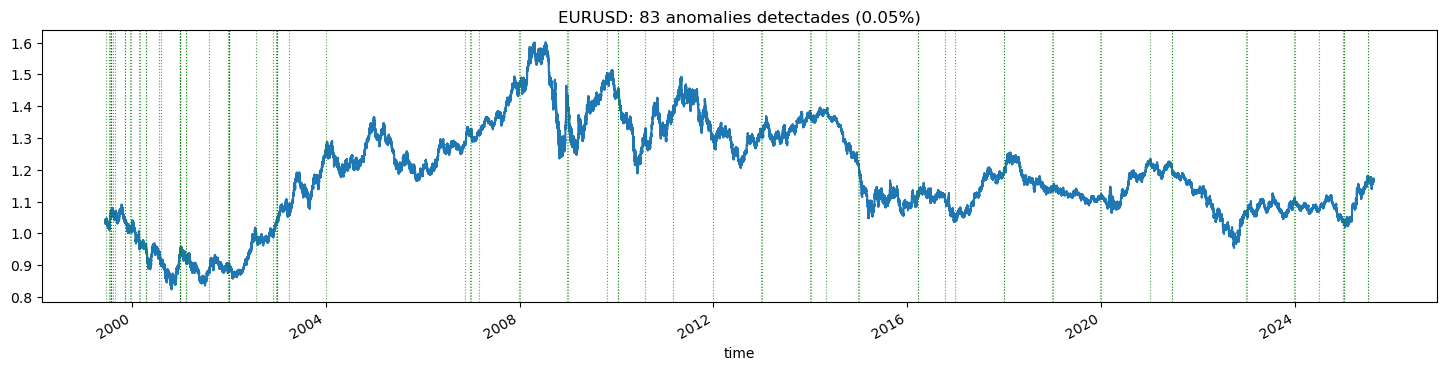

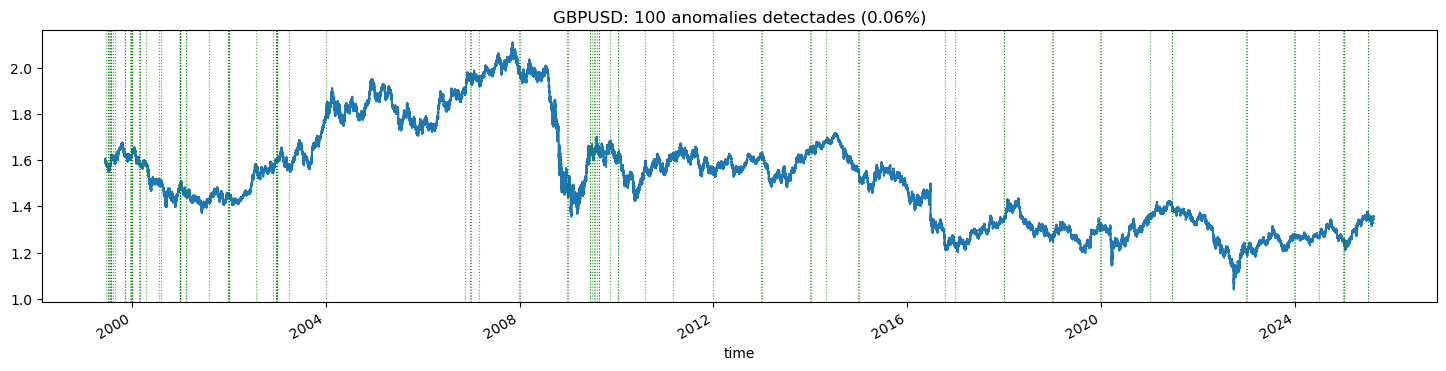

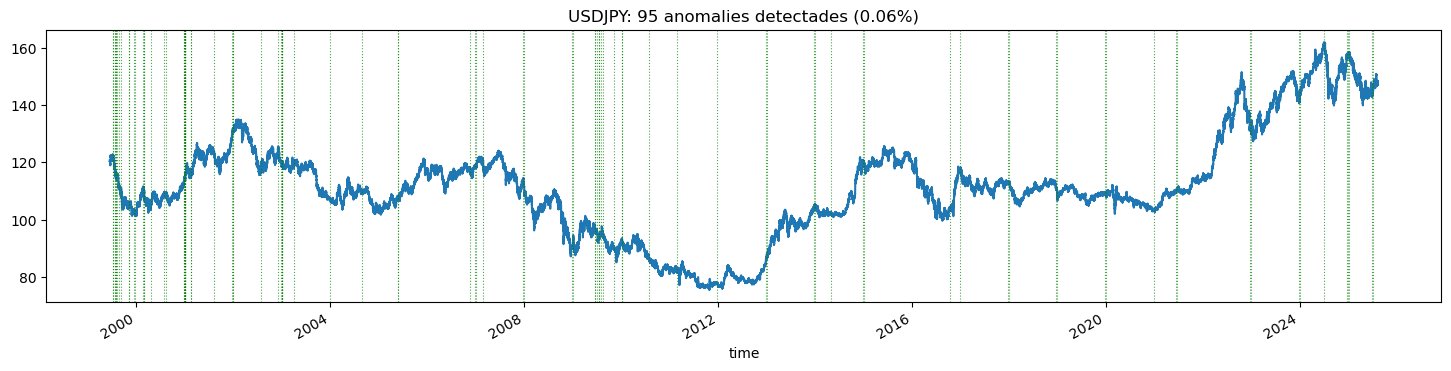

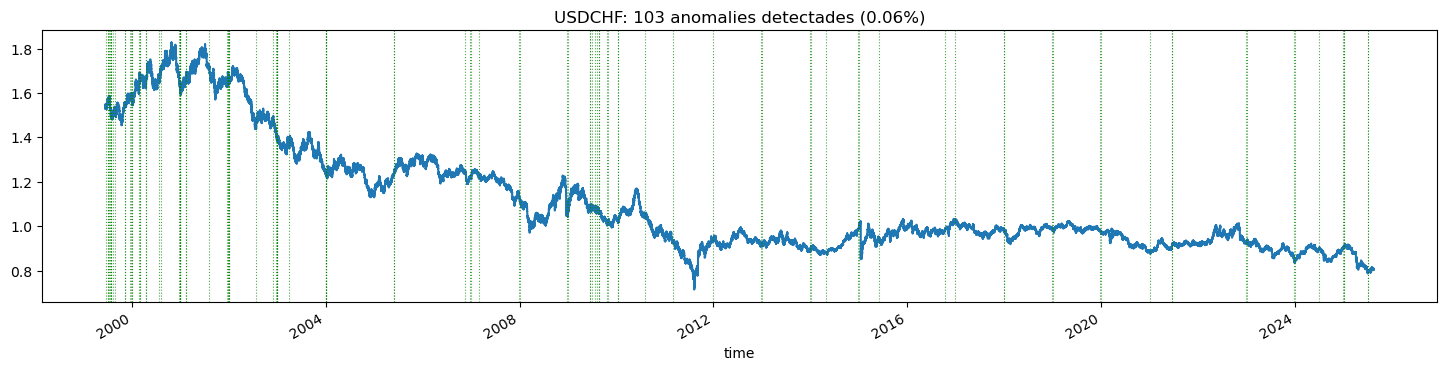

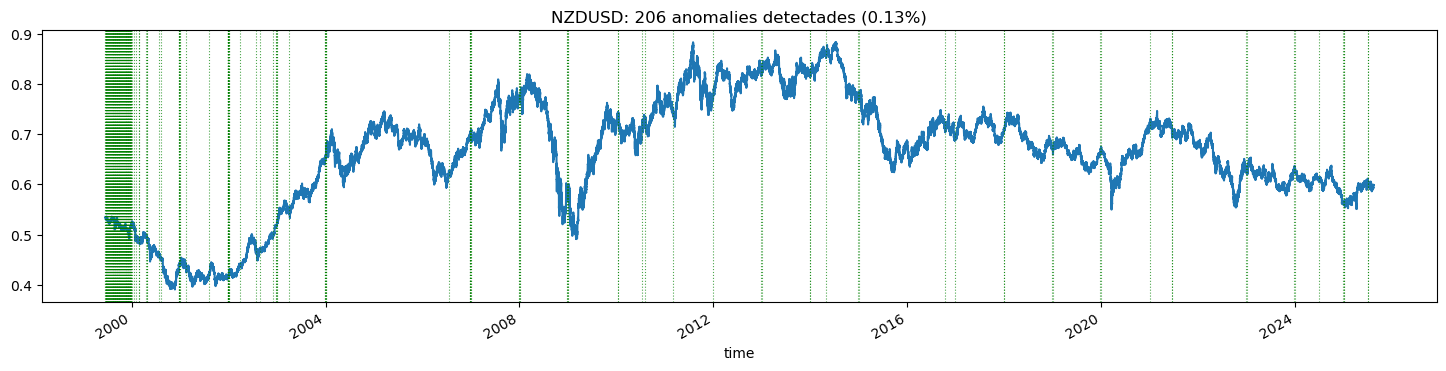

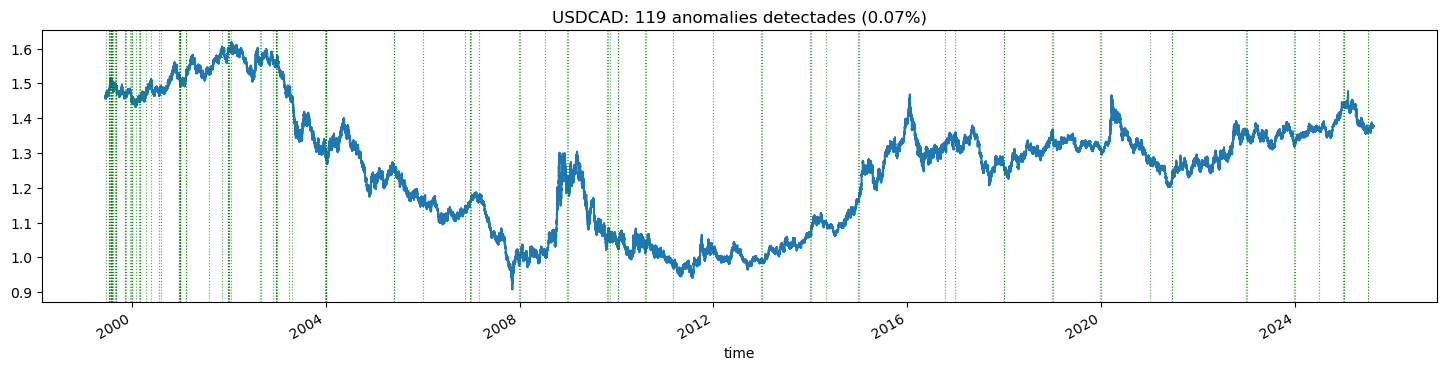

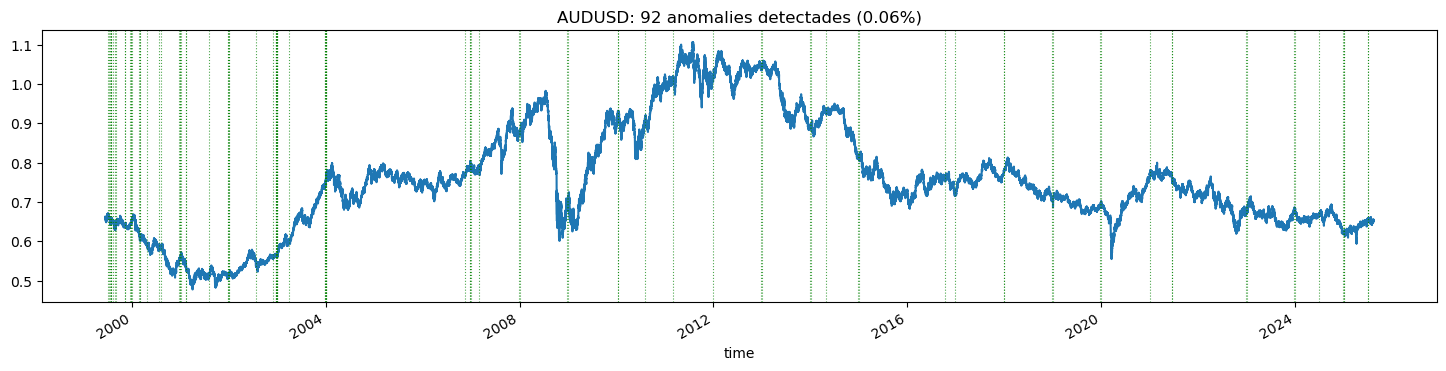

In [5]:
timeframe = "H1"; 
for symbol in symbols:
    path_data = os.path.join(path_root, "output", "Forex", timeframe)
    filename = os.path.join(path_data, f"{symbol}.csv.gz")
    data = pd.read_csv(filename, parse_dates=["time"])
    data["dow"] = data.time.dt.dayofweek
    data["year"] = data.time.dt.year
    data["month"] = data.time.dt.month
    data["day"] = data.time.dt.day
    data["hour"] = data.time.dt.hour
    data["diff_time"] = data.time.diff().dt.total_seconds() / 3600
    data = data.dropna()
    anomalies = ~((data['diff_time'] == 1) | ((data['dow'] == 0) & (data['hour'] == 0)))
    titol = f"{symbol}: {sum(anomalies)} anomalies detectades ({sum(anomalies)/len(data)*100:.2f}%)"
    plt.figure(figsize=(18,4))
    data.set_index('time').close.plot(title=titol)
    for x in data[anomalies].time.unique():
        plt.axvline(x, color='green', linestyle=':', linewidth=0.8, alpha=0.7)
    plot_path = os.path.join(path_root, "output", "Forex", "charts")
    os.makedirs(plot_path, exist_ok=True)  # Crea carpeta si no existeix
    plt.savefig(os.path.join(plot_path, f"{symbol}_anomalies_{timeframe}.png"), dpi=150, bbox_inches='tight')            
    plt.show()

### Qualitat dades M1

EURUSD: 4946 anomalies detectades (0.05%)


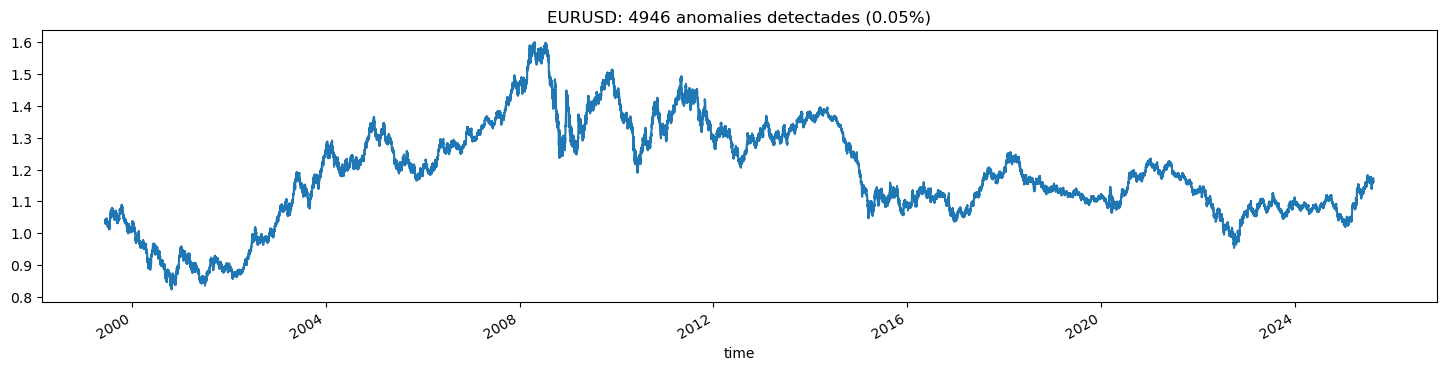

GBPUSD: 10019 anomalies detectades (0.11%)


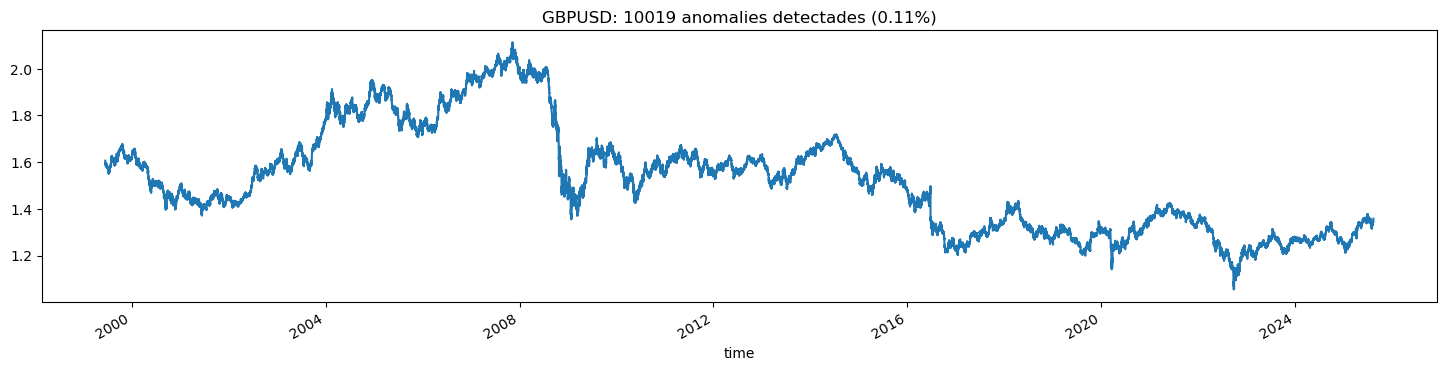

USDJPY: 4952 anomalies detectades (0.05%)


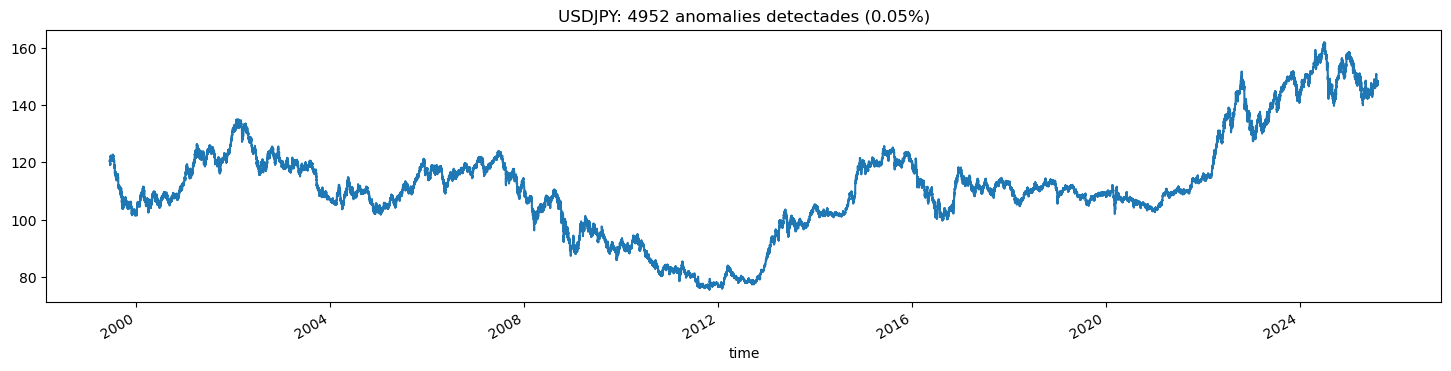

USDCHF: 8473 anomalies detectades (0.09%)


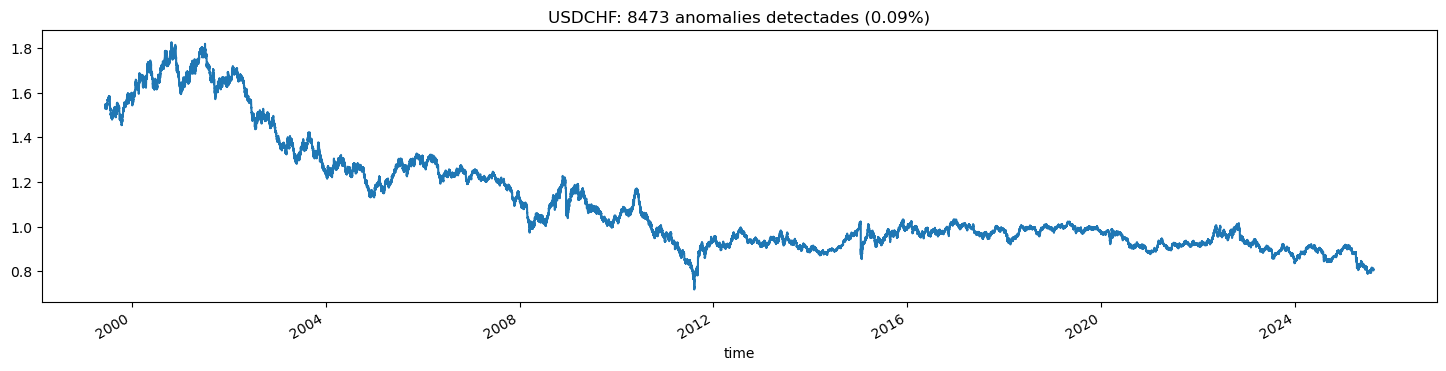

NZDUSD: 35092 anomalies detectades (0.41%)


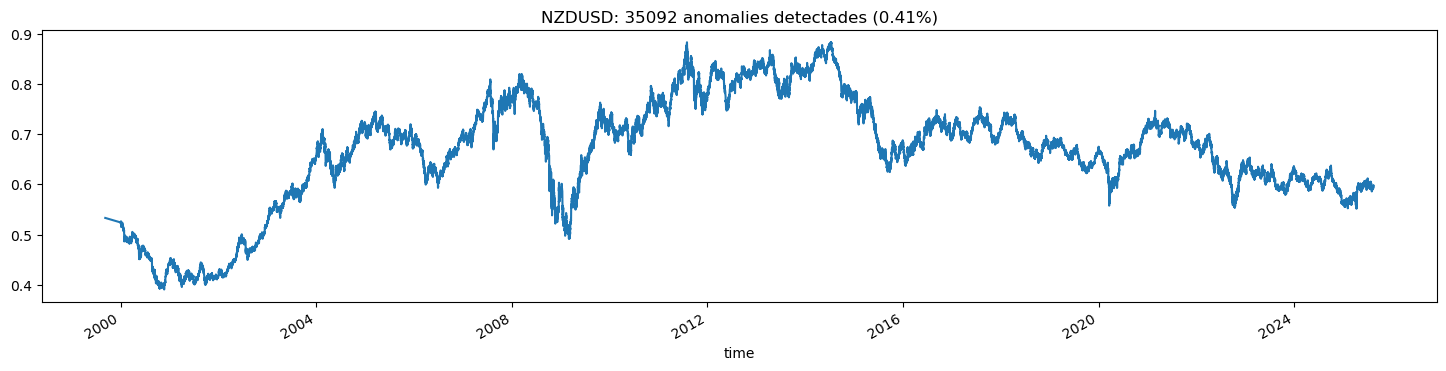

USDCAD: 31788 anomalies detectades (0.35%)


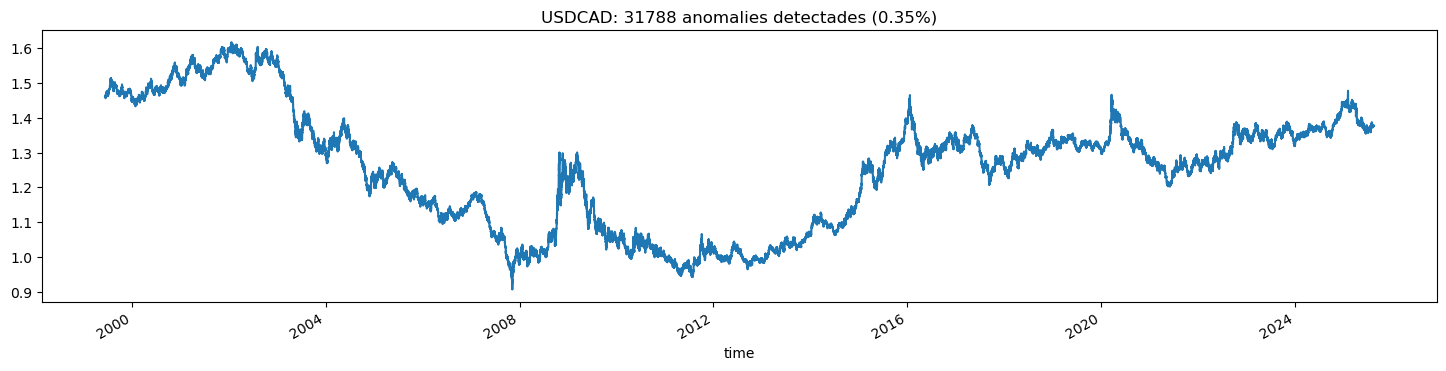

AUDUSD: 17231 anomalies detectades (0.19%)


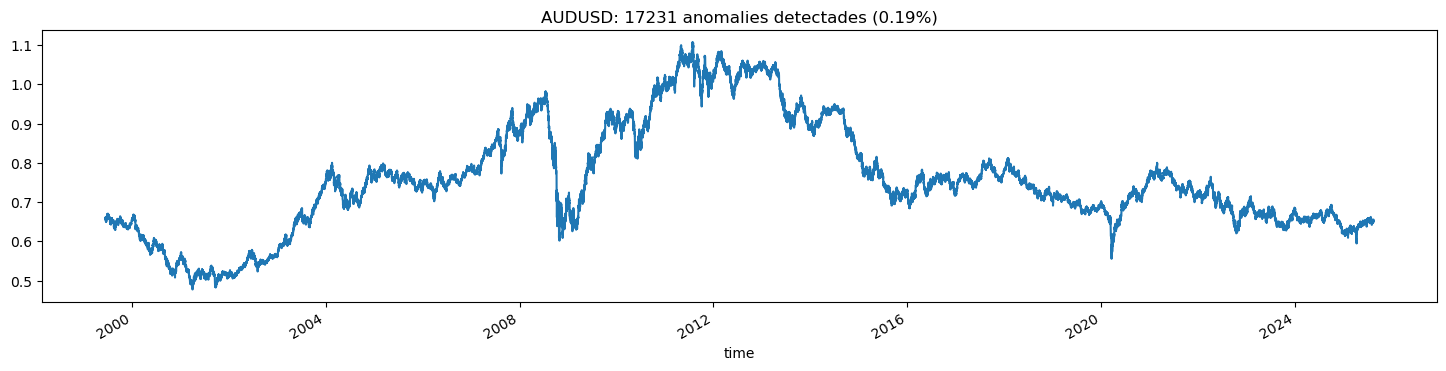

In [6]:
timeframe = "M1"; 
for symbol in symbols:
    path_data = os.path.join(path_root, "output", "Forex", timeframe)
    filename = os.path.join(path_data, f"{symbol}.csv.gz")
    data = pd.read_csv(filename, parse_dates=["time"])
    data["dow"] = data.time.dt.dayofweek
    data["year"] = data.time.dt.year
    data["month"] = data.time.dt.month
    data["day"] = data.time.dt.day
    data["hour"] = data.time.dt.hour
    data["diff_time"] = data.time.diff().dt.total_seconds() / 60
    data = data.dropna()
    anomalies = ~((data['diff_time'] <= 5) | ((data['dow'] == 0) & (data['hour'] == 0)))
    titol = f"{symbol}: {sum(anomalies)} anomalies detectades ({sum(anomalies)/len(data)*100:.2f}%)"
    print(titol)
    plt.figure(figsize=(18,4))
    data.sample(frac=0.01, random_state=42).sort_values(by="time").set_index('time').close.plot(title=titol)
    plot_path = os.path.join(path_root, "output", "Forex", "charts")
    os.makedirs(plot_path, exist_ok=True)  # Crea carpeta si no existeix
    plt.savefig(os.path.join(plot_path, f"{symbol}_anomalies_{timeframe}.png"), dpi=150, bbox_inches='tight')        
    plt.show()